In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from pprint import pprint

# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score


In [9]:
df = pd.read_csv(r'C:\Users\RDITLBMJ\Documents\Data_ML\waterquality.csv')
df.head()

,STATION CODE,LOCATIONS,STATE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,1312,"GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA",MAHARASHTRA,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0
1,2177,GODAVARI RIVER NEAR SOMESHWAR TEMPLE.,MAHARASHTRA,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0
2,2182,GODAVARI RIVER AT SAIKHEDA.,MAHARASHTRA,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0
3,2179,"GODAVARI RIVER AT HANUMAN GHAT, NASHIK CITY.",MAHARASHTRA,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0
4,2183,GODAVARI RIVER AT NANDUR- MADMESHWAR DAM.,MAHARASHTRA,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0


In [11]:
df.isnull().sum()

STATION CODE            0
LOCATIONS               0
STATE                   0
TEMP                    5
DO                      2
pH                      0
CONDUCTIVITY           30
BOD                     6
NITRATE_N_NITRITE_N     2
FECAL_COLIFORM         82
TOTAL_COLIFORM         39
dtype: int64

In [13]:
df = df.drop(columns=['STATION CODE','LOCATIONS', 'STATE'])
df

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0
1,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0
2,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0
3,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0
4,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0
...,...,...,...,...,...,...,...,...
529,23.2,4.4,8.1,538.0,1.2,1.00,5.0,14.0
530,22.9,5.6,8.4,591.0,1.1,3.00,4.0,8.0
531,22.9,5.8,8.5,588.0,1.2,3.00,4.0,6.0
532,28.7,4.1,7.9,1133.0,2.3,2.00,7.0,67.0


In [15]:
# Filling Null Values using K-Nearest Neighbor Imputation
impute_knn = KNNImputer(n_neighbors=5,weights='distance')
df_imputed = impute_knn.fit_transform(df)

In [17]:
df = pd.DataFrame(df_imputed, columns=['TEMP', 'DO', 'pH', 'CONDUCTIVITY', 'BOD', 'NITRATE_N_NITRITE_N', 'FECAL_COLIFORM', 'TOTAL_COLIFORM'])
df

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0
1,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0
2,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0
3,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0
4,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0
...,...,...,...,...,...,...,...,...
529,23.2,4.4,8.1,538.0,1.2,1.00,5.0,14.0
530,22.9,5.6,8.4,591.0,1.1,3.00,4.0,8.0
531,22.9,5.8,8.5,588.0,1.2,3.00,4.0,6.0
532,28.7,4.1,7.9,1133.0,2.3,2.00,7.0,67.0


In [19]:
df.isnull().sum()

TEMP                   0
DO                     0
pH                     0
CONDUCTIVITY           0
BOD                    0
NITRATE_N_NITRITE_N    0
FECAL_COLIFORM         0
TOTAL_COLIFORM         0
dtype: int64

In [21]:
def sub_indx(c,w,s):
    relw=w/1
    wqi=relw*(c/s)*100
    return wqi
x=sub_indx(df.DO,0.20,9.5)
df['sub_indx_DO']=x

In [23]:
def sub_indx(c,w,s):
    relw=w/1
    wqi=relw*(c/s)*100
    return wqi
x=sub_indx(df.pH,0.15,7.5)
df['sub_indx_pH']=x

In [25]:
def sub_indx(c,w,s):
    relw=w/1
    wqi=relw*(c/s)*100
    return wqi
x=sub_indx(df.CONDUCTIVITY,0.10,1000)
df['sub_indx_CONDUCTIVITY']=x

In [27]:
def sub_indx(c,w,s):
    relw=w/1
    wqi=relw*(c/s)*100
    return wqi
x=sub_indx(df.BOD,0.15,3)
df['sub_indx_BOD']=x

In [29]:
def sub_indx(c,w,s):
    relw=w/1
    wqi=relw*(c/s)*100
    return wqi
x=sub_indx(df.NITRATE_N_NITRITE_N,0.10,5)
df['sub_indx_NITRATE_N_NITRITE_N']=x

In [31]:
def sub_indx(c,w,s):
    relw=w/1
    wqi=relw*(c/s)*100
    return wqi
x=sub_indx(df.FECAL_COLIFORM,0.15,500)
df['sub_indx_FECAL_COLIFORM']=x

In [33]:
def sub_indx(c,w,s):
    relw=w/1
    wqi=relw*(c/s)*100
    return wqi
x=sub_indx(df.TOTAL_COLIFORM,0.15,2500)
df['sub_indx_TOTAL_COLIFORM']=x

In [35]:
sum_sub_indx=df.iloc[:,8:]
final_wqi=sum_sub_indx.sum(axis=1)
final_wqi

0      58.551684
1      54.083579
2      72.296947
3      70.386947
4      54.262000
         ...    
529    39.077158
530    46.167474
531    47.246526
532    51.873579
533    81.586421
Length: 534, dtype: float64

In [37]:
df['WQI']=final_wqi
df

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,sub_indx_DO,sub_indx_pH,sub_indx_CONDUCTIVITY,sub_indx_BOD,sub_indx_NITRATE_N_NITRITE_N,sub_indx_FECAL_COLIFORM,sub_indx_TOTAL_COLIFORM,WQI
0,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0,13.473684,16.2,7.35,17.0,4.00,0.09,0.438,58.551684
1,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0,12.631579,16.0,2.70,15.5,4.00,2.16,1.092,54.083579
2,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0,11.578947,15.6,3.55,21.0,18.00,1.77,0.798,72.296947
3,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0,11.578947,15.6,3.71,28.0,7.10,2.70,1.698,70.386947
4,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0,12.000000,15.8,2.94,16.0,5.38,1.35,0.792,54.262000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,23.2,4.4,8.1,538.0,1.2,1.00,5.0,14.0,9.263158,16.2,5.38,6.0,2.00,0.15,0.084,39.077158
530,22.9,5.6,8.4,591.0,1.1,3.00,4.0,8.0,11.789474,16.8,5.91,5.5,6.00,0.12,0.048,46.167474
531,22.9,5.8,8.5,588.0,1.2,3.00,4.0,6.0,12.210526,17.0,5.88,6.0,6.00,0.12,0.036,47.246526
532,28.7,4.1,7.9,1133.0,2.3,2.00,7.0,67.0,8.631579,15.8,11.33,11.5,4.00,0.21,0.402,51.873579


In [117]:
X = df.drop(columns=['WQI'])
y = df['WQI']

In [119]:
# Standardizing Data Using Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [121]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [123]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.2)

In [133]:
rf = RandomForestRegressor(random_state=42)

In [135]:
# Training Model using default parameters
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [137]:
# Making Predictions
y_pred = rf.predict(X_test)

In [139]:
# Evaluation of Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}', f'Mean Squared Error: {mse}', f'R2 Score: {r2}')

Mean Absolute Error: 825.8758469152276 Mean Squared Error: 35947992.88999758 R2 Score: 0.8743826411788852


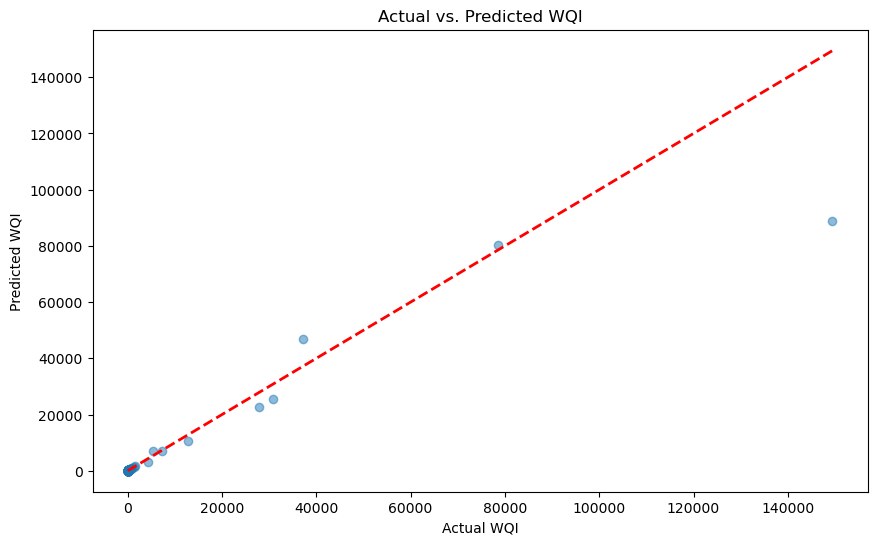

In [141]:
# Visualization of Predictions Scatter Plots

# Scatter plot of actual vs. predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)  # 45-degree line
plt.xlabel('Actual WQI')
plt.ylabel('Predicted WQI')
plt.title('Actual vs. Predicted WQI')
plt.show()


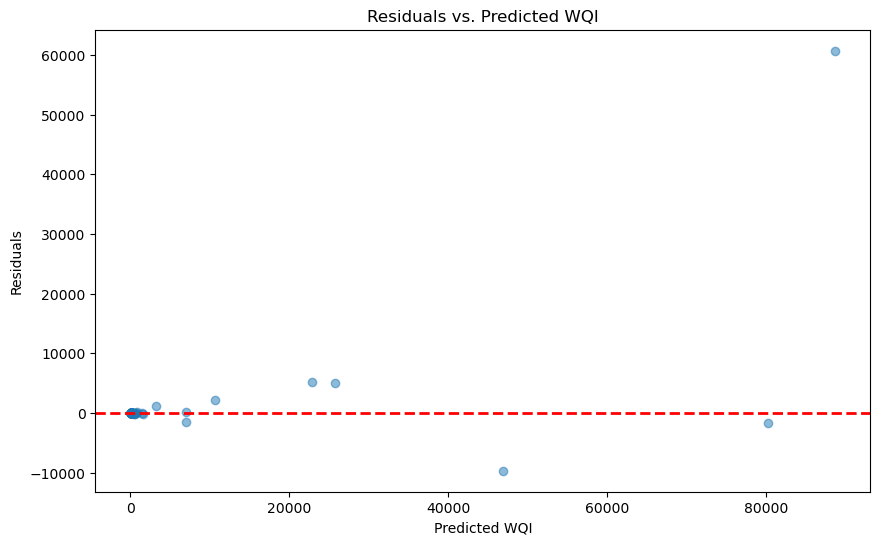

In [143]:
# Visualization of Predictions Residuals 

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted WQI')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted WQI')
plt.show()

In [95]:
# Creating a dictionary of Hyperparameter Values to search
search_grid = {"n_estimators" : [100, 300, 500],
               "max_depth" : [4, 8, 16, 20],
               "criterion" : ["squared_error", "absolute_error"],
               "min_samples_split" : [4, 6, 8],
               "max_features" : [4,6,8],
               "max_leaf_nodes" : [3,5,9]}

In [101]:
# Creating GridSearchCV object
GS = GridSearchCV(estimator = rf,
                  param_grid = search_grid,
                  scoring = ["r2", "neg_mean_squared_error", "neg_mean_absolute_error"],
                  refit = "r2",
                  cv = 5,
                  verbose = 4)

In [103]:
GS.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV 1/5] END criterion=squared_error, max_depth=4, max_features=4, max_leaf_nodes=3, min_samples_split=4, n_estimators=100; neg_mean_absolute_error: (test=-400.182) neg_mean_squared_error: (test=-2260868.921) r2: (test=-0.212) total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=4, max_features=4, max_leaf_nodes=3, min_samples_split=4, n_estimators=100; neg_mean_absolute_error: (test=-974.295) neg_mean_squared_error: (test=-15130745.823) r2: (test=-5.609) total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=4, max_features=4, max_leaf_nodes=3, min_samples_split=4, n_estimators=100; neg_mean_absolute_error: (test=-844.518) neg_mean_squared_error: (test=-18873615.189) r2: (test=0.739) total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=4, max_features=4, max_leaf_nodes=3, min_samples_split=4, n_estimators=100; neg_mean_absolute_error: (test=-1484.492) neg_mean_squared_error: (test=-

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [4, 8, 16, 20], 'max_features': [4, 6, 8],
                         'max_leaf_nodes': [3, 5, 9],
                         'min_samples_split': [4, 6, 8],
                         'n_estimators': [100, 300, 500]},
             refit='r2',
             scoring=['r2', 'neg_mean_squared_error',
                      'neg_mean_absolute_error'],
             verbose=4)

In [105]:
# Getting Complete Details of Best Model
print(GS.best_estimator_)

RandomForestRegressor(max_depth=4, max_features=8, max_leaf_nodes=3,
                      min_samples_split=4, n_estimators=500, random_state=42)


In [107]:
# Getting Best Hyperparameter Values Searched For
print(GS.best_params_)

{'criterion': 'squared_error', 'max_depth': 4, 'max_features': 8, 'max_leaf_nodes': 3, 'min_samples_split': 4, 'n_estimators': 500}


In [109]:
# Best R2 Score
GS.best_score_

0.05409305073896633

In [163]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.2)

In [165]:
rf_best = RandomForestRegressor(criterion='squared_error', max_depth= 4, max_features= 8, max_leaf_nodes= 3, min_samples_split= 4, n_estimators= 500,random_state=42)

In [167]:
# Training Model using default parameters
rf_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, max_features=8, max_leaf_nodes=3,
                      min_samples_split=4, n_estimators=500, random_state=42)

In [171]:
# Making Predictions
best_pred = rf_best.predict(X_test)

In [173]:
# Evaluation of Model
mae_best = mean_absolute_error(y_test, best_pred)
mse_best = mean_squared_error(y_test, best_pred)
r2_best = r2_score(y_test, best_pred)
print(f'Mean Absolute Error: {mae_best}', f'Mean Squared Error: {mse_best}', f'R2 Score: {r2_best}')

Mean Absolute Error: 1368.2061504462242 Mean Squared Error: 54034667.446486324 R2 Score: 0.8111802172050185


In [263]:
# Utilizing RFE to select best features using RandomForestRegressor() model
rfe = RFE(rf, n_features_to_select=5) # Selecting top 5 features
rfe.fit(X_scaled, y)

RFE(estimator=RandomForestRegressor(random_state=42), n_features_to_select=5)

In [265]:
# Getting the selected features
top_features = X_scaled.columns[rfe.support_]
top_features

Index(['FECAL_COLIFORM', 'TOTAL_COLIFORM', 'sub_indx_DO',
       'sub_indx_FECAL_COLIFORM', 'sub_indx_TOTAL_COLIFORM'],
      dtype='object')

In [ ]:
# Selecting Features to train model on
selected_features = ['FECAL_COLIFORM', 'TOTAL_COLIFORM', 'sub_indx_DO', 'sub_indx_FECAL_COLIFORM', 'sub_indx_TOTAL_COLIFORM']
selected_features

In [273]:
X_rfe = X_scaled[selected_features]

In [275]:
# Train-test split
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_rfe, y, random_state=42, test_size=0.2)

In [281]:
# Creating new Model to Train with Top Selected Features
rf_rfe = RandomForestRegressor(random_state=42)

In [283]:
# Training Model on new data with Top Features
rf_rfe.fit(X_train_rfe, y_train_rfe)

RandomForestRegressor(random_state=42)

In [285]:
# Making Predictions
y_pred_rfe = rf_rfe.predict(X_test_rfe)

In [287]:
# Evaluation of Model
mae_rfe = mean_absolute_error(y_test_rfe, y_pred_rfe)
mse_rfe = mean_squared_error(y_test_rfe, y_pred_rfe)
r2_rfe = r2_score(y_test_rfe, y_pred_rfe)
print(f'Mean Absolute Error: {mae_rfe}', f'Mean Squared Error: {mse_rfe}', f'R2 Score: {r2_rfe}')

Mean Absolute Error: 2548.4497973407433 Mean Squared Error: 130747618.91970964 R2 Score: 0.5431130018551462


In [61]:
# Adding WQI to X_scaled in order to perform Correlation Analysis
X_scaled_with_WQI = X_scaled.copy()
X_scaled_with_WQI['WQI'] = y
X_scaled_with_WQI

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,sub_indx_DO,sub_indx_pH,sub_indx_CONDUCTIVITY,sub_indx_BOD,sub_indx_NITRATE_N_NITRITE_N,sub_indx_FECAL_COLIFORM,sub_indx_TOTAL_COLIFORM,WQI
0,1.157512,0.010221,0.464890,0.022859,-0.226059,0.223626,-0.245221,-0.120922,0.010221,0.464890,0.022859,-0.226059,0.223626,-0.245221,-0.120922,58.551684
1,-0.210767,-0.236431,0.310888,-0.245740,-0.261547,0.223626,-0.243085,-0.120854,-0.236431,0.310888,-0.245740,-0.261547,0.223626,-0.243085,-0.120854,54.083579
2,0.167693,-0.544746,0.002884,-0.196641,-0.131424,2.726402,-0.243488,-0.120885,-0.544746,0.002884,-0.196641,-0.131424,2.726402,-0.243488,-0.120885,72.296947
3,-0.123430,-0.544746,0.002884,-0.187399,0.034188,0.777812,-0.242528,-0.120791,-0.544746,0.002884,-0.187399,0.034188,0.777812,-0.242528,-0.120791,70.386947
4,0.138581,-0.421420,0.156886,-0.231877,-0.249718,0.470329,-0.243921,-0.120886,-0.421420,0.156886,-0.231877,-0.249718,0.470329,-0.243921,-0.120886,54.262000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,-0.589227,-1.223038,0.464890,-0.090935,-0.486306,-0.133913,-0.245159,-0.120959,-1.223038,0.464890,-0.090935,-0.486306,-0.133913,-0.245159,-0.120959,39.077158
530,-0.676564,-0.483083,0.926897,-0.060320,-0.498135,0.581166,-0.245190,-0.120963,-0.483083,0.926897,-0.060320,-0.498135,0.581166,-0.245190,-0.120963,46.167474
531,-0.676564,-0.359757,1.080899,-0.062053,-0.486306,0.581166,-0.245190,-0.120964,-0.359757,1.080899,-0.062053,-0.486306,0.581166,-0.245190,-0.120964,47.246526
532,1.011951,-1.408026,0.156886,0.252756,-0.356182,0.223626,-0.245097,-0.120926,-1.408026,0.156886,0.252756,-0.356182,0.223626,-0.245097,-0.120926,51.873579


In [63]:
# Feature Selection Using Correlation Analysis
corr_matrix = X_scaled_with_WQI.corr()
corr_matrix

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,sub_indx_DO,sub_indx_pH,sub_indx_CONDUCTIVITY,sub_indx_BOD,sub_indx_NITRATE_N_NITRITE_N,sub_indx_FECAL_COLIFORM,sub_indx_TOTAL_COLIFORM,WQI
TEMP,1.000000,-0.175002,0.019722,0.086993,-0.076711,0.083501,-0.011017,-0.084340,-0.175002,0.019722,0.086993,-0.076711,0.083501,-0.011017,-0.084340,-0.081624
DO,-0.175002,1.000000,0.067241,-0.115560,-0.549644,-0.274494,-0.202839,-0.348933,1.000000,0.067241,-0.115560,-0.549644,-0.274494,-0.202839,-0.348933,-0.354377
pH,0.019722,0.067241,1.000000,0.005369,-0.055510,-0.018118,-0.025709,-0.073171,0.067241,1.000000,0.005369,-0.055510,-0.018118,-0.025709,-0.073171,-0.072292
CONDUCTIVITY,0.086993,-0.115560,0.005369,1.000000,0.106365,0.094345,0.003523,0.019412,-0.115560,0.005369,1.000000,0.106365,0.094345,0.003523,0.019412,0.021018
BOD,-0.076711,-0.549644,-0.055510,0.106365,1.000000,0.282575,0.352735,0.357677,-0.549644,-0.055510,0.106365,1.000000,0.282575,0.352735,0.357677,0.379162
NITRATE_N_NITRITE_N,0.083501,-0.274494,-0.018118,0.094345,0.282575,1.000000,0.078558,0.087607,-0.274494,-0.018118,0.094345,0.282575,1.000000,0.078558,0.087607,0.092859
FECAL_COLIFORM,-0.011017,-0.202839,-0.025709,0.003523,0.352735,0.078558,1.000000,0.432709,-0.202839,-0.025709,0.003523,0.352735,0.078558,1.000000,0.432709,0.510056
TOTAL_COLIFORM,-0.084340,-0.348933,-0.073171,0.019412,0.357677,0.087607,0.432709,1.000000,-0.348933,-0.073171,0.019412,0.357677,0.087607,0.432709,1.000000,0.996142
sub_indx_DO,-0.175002,1.000000,0.067241,-0.115560,-0.549644,-0.274494,-0.202839,-0.348933,1.000000,0.067241,-0.115560,-0.549644,-0.274494,-0.202839,-0.348933,-0.354377
sub_indx_pH,0.019722,0.067241,1.000000,0.005369,-0.055510,-0.018118,-0.025709,-0.073171,0.067241,1.000000,0.005369,-0.055510,-0.018118,-0.025709,-0.073171,-0.072292


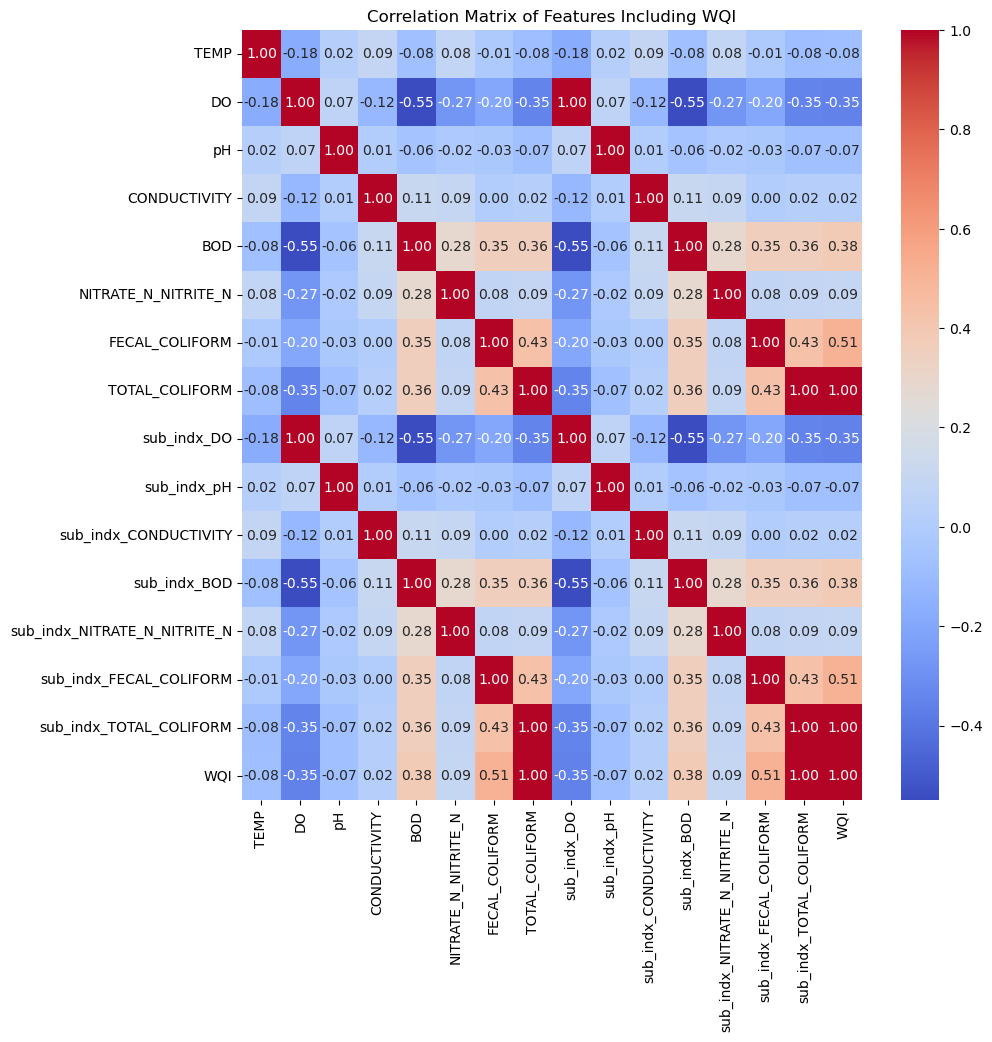

In [310]:
# Visualization of Correlation Analysis

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features Including WQI')
plt.show()

In [229]:
# Set a correlation threshold (e.g., 0.8) for dropping features
threshold = 0.8

# Find features that are highly correlated with WQI
high_corr_with_target = corr_matrix['WQI'][abs(corr_matrix['WQI']) > threshold].index.tolist()
high_corr_with_target.remove('WQI')  # Remove WQI from the list

# Display features with high correlation with WQI
print("Features with high correlation with WQI:", high_corr_with_target)

# Find pairs of features that are highly correlated with each other
corr_pairs = corr_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)
high_corr_pairs = corr_pairs[(corr_pairs > threshold) & (corr_pairs < 1)]

# Display highly correlated pairs
print("Highly correlated pairs of features:", high_corr_pairs)

# Drop one feature from each highly correlated pair except WQI
features_to_drop = set()
for pair in high_corr_pairs.index:
    feature1, feature2 = pair
    if feature1 != 'WQI' and feature2 != 'WQI':
        # Add the second feature of the pair to the drop list
        features_to_drop.add(feature2)

# Remove the target variable 'WQI' from features_to_drop if it got included
features_to_drop.discard('WQI')

# Drop the selected features from the DataFrame
X_final = X_scaled_with_WQI.drop(columns=list(features_to_drop))

# Display the updated DataFrame
X_final.head()


Features with high correlation with WQI: ['TOTAL_COLIFORM', 'sub_indx_TOTAL_COLIFORM']
Highly correlated pairs of features: WQI                      sub_indx_TOTAL_COLIFORM    0.996142
TOTAL_COLIFORM           WQI                        0.996142
WQI                      TOTAL_COLIFORM             0.996142
sub_indx_TOTAL_COLIFORM  WQI                        0.996142
dtype: float64


,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM,sub_indx_DO,sub_indx_pH,sub_indx_CONDUCTIVITY,sub_indx_BOD,sub_indx_NITRATE_N_NITRITE_N,sub_indx_FECAL_COLIFORM,sub_indx_TOTAL_COLIFORM,WQI
0,1.157512,0.010221,0.464890,0.022859,-0.226059,0.223626,-0.245221,-0.120922,0.010221,0.464890,0.022859,-0.226059,0.223626,-0.245221,-0.120922,58.551684
1,-0.210767,-0.236431,0.310888,-0.245740,-0.261547,0.223626,-0.243085,-0.120854,-0.236431,0.310888,-0.245740,-0.261547,0.223626,-0.243085,-0.120854,54.083579
2,0.167693,-0.544746,0.002884,-0.196641,-0.131424,2.726402,-0.243488,-0.120885,-0.544746,0.002884,-0.196641,-0.131424,2.726402,-0.243488,-0.120885,72.296947
3,-0.123430,-0.544746,0.002884,-0.187399,0.034188,0.777812,-0.242528,-0.120791,-0.544746,0.002884,-0.187399,0.034188,0.777812,-0.242528,-0.120791,70.386947
4,0.138581,-0.421420,0.156886,-0.231877,-0.249718,0.470329,-0.243921,-0.120886,-0.421420,0.156886,-0.231877,-0.249718,0.470329,-0.243921,-0.120886,54.262000


In [231]:
# Selecting Features with highest correlation to WQI
corr_features = ['BOD','FECAL_COLIFORM','TOTAL_COLIFORM', 'sub_indx_BOD', 'sub_indx_FECAL_COLIFORM', 'sub_indx_TOTAL_COLIFORM']

In [233]:
# Declaring new variables for Correlated Features to train model on
X_corr = X_final[corr_features]
y_corr = X_final['WQI']
X_corr

,BOD,FECAL_COLIFORM,TOTAL_COLIFORM,sub_indx_BOD,sub_indx_FECAL_COLIFORM,sub_indx_TOTAL_COLIFORM
0,-0.226059,-0.245221,-0.120922,-0.226059,-0.245221,-0.120922
1,-0.261547,-0.243085,-0.120854,-0.261547,-0.243085,-0.120854
2,-0.131424,-0.243488,-0.120885,-0.131424,-0.243488,-0.120885
3,0.034188,-0.242528,-0.120791,0.034188,-0.242528,-0.120791
4,-0.249718,-0.243921,-0.120886,-0.249718,-0.243921,-0.120886
...,...,...,...,...,...,...
529,-0.486306,-0.245159,-0.120959,-0.486306,-0.245159,-0.120959
530,-0.498135,-0.245190,-0.120963,-0.498135,-0.245190,-0.120963
531,-0.486306,-0.245190,-0.120964,-0.486306,-0.245190,-0.120964
532,-0.356182,-0.245097,-0.120926,-0.356182,-0.245097,-0.120926


In [235]:
# Train-test split
X_train_corr, X_test_corr, y_train_corr, y_test_corr = train_test_split(X_corr, y_corr, test_size=0.2, random_state=42)

In [241]:
# Model training
rf_corr = RandomForestRegressor(n_estimators=1000,criterion='absolute_error', min_samples_split=4, min_samples_leaf=2, max_features=6, max_leaf_nodes=3, random_state=42)
rf_corr.fit(X_train_corr, y_train_corr)

RandomForestRegressor(criterion='absolute_error', max_features=6,
                      max_leaf_nodes=3, min_samples_leaf=2, min_samples_split=4,
                      n_estimators=1000, random_state=42)

In [243]:
# Making Predictions
y_pred_corr = rf_corr.predict(X_test_corr)

In [245]:
# Evaluation of Model
mae_corr = mean_absolute_error(y_test2, y_pred2)
mse_corr = mean_squared_error(y_test2, y_pred2)
r2_corr = r2_score(y_test, y_pred2)
print(f'Mean Absolute Error: {mae_corr}', f'Mean Squared Error: {mse_corr}', f'R2 Score: {r2_corr}')

Mean Absolute Error: 1162.8562428393227 Mean Squared Error: 64829384.47632712 R2 Score: 0.7734589500772726


In [ ]:
# Creating a dictionary of Hyperparameter Values to search
search_grid_corr = {"n_estimators" : [100, 500, 1000],
               "max_depth" : [4, 8, 12, 16, 20],
               "criterion" : ["squared_error", "absolute_error", "friedman_mse"],
               "min_samples_split" : [2, 4, 6, 8],
               "max_features" : [4,6,8],
               "max_leaf_nodes" : [3,5,9]}

In [ ]:
# Creating GridSearchCV object
GS_corr = GridSearchCV(estimator = rf_corr,
                  param_grid = search_grid_corr,
                  scoring = ["r2", "neg_mean_squared_error", "neg_mean_absolute_error"],
                  refit = "r2",
                  cv = 5,
                  verbose = 4)